In [20]:
import numpy as np
import matplotlib.pyplot as plt
#import resfuncRead as rfr

In [3]:
#read the files (from anthony)
#ptres = rfr.getRFunc('data/jardin_ptres.txt')
#qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

In [148]:
k = 0.157 # from lindhard
q = 1.602*10**-19 #electron charge 
V = 4.0 # voltage Bias
eps = 3.3

#for detector 1.

p_alpha = 0.155393
p_beta = 9.60343*10**(-11)
p_gamma = 0.000506287

q_alpha = 0.166004
q_beta = 0.00233716
q_gamma = 9.52576*10**(-5)

In [251]:
x = np.arange(0,200,0.1)

Er = 93*np.exp(-x/29) #For NR from Kennedy Thesis 
#Er = np.random.normal(0, 0.3, 200)


ER = []
Yield = []
Ran = []
Yl= []


In [252]:
#For Nuclear Recoils 
for i in np.arange(0,10000):
    
    Enr = np.random.choice(Er)
    Ran.append(E)
    
    sig_p = np.sqrt(p_alpha + p_beta*Enr + p_gamma*(Enr**2)) #Phonon uncertainty (energy dependent)
    sig_q = np.sqrt(q_alpha + q_beta*Enr + q_gamma*(Enr**2)) #Charge uncertainty 
    
    esp = 11.5*Enr*(23)**-(7/3)
    g = 3*esp**(0.15)+0.7*esp**(0.6)+esp
    Y = k*g/(1+k*g)
    Yl.append(Y)
        
    #Ft = 1/np.sqrt(2*3.14*sig_p**2)*np.exp(-(x-(1+Y*(q*V/0.036))*Er)**2/2*sig_p**2)#equation 5.2
    Fnr = np.random.normal(0.0,sig_p) #random sample assuming phonon variance 

    #Fq = 1/np.sqrt(2*3.14*sig_q**2)*np.exp(-(x-0.3*Er)**2/2*sig_q**2)# equation 5.23
    Fq = np.random.normal(0.0,sig_q) #random sampel assuming charge variance 
    

    Ptnr = (Y*Enr*V)/eps + Enr #total phonon energy 
    Ptnr = Ptnr + Fnr 
    
    Qnr = Y*Enr
    Qnr1 = Qnr + Fq 
    
    
    Ernr = Ptnr - (V/eps)*Qnr1
    ER.append(Ernr)

    yield1 = Qnr1 / Ernr
    Yield.append(yield1)
    

In [231]:
Yield_er = []
ERer = []

In [253]:
#For Electron Recoils. 

x = np.arange(0,200,0.1)
E1er = 82*np.exp(-x/304) #For ER from Kennedy Thesis
#E1er = 93*np.exp(-x/29)


for i in np.arange(10000):
    
    Eer = np.random.choice(E1er) #randomly sample from Energy dist 
    
    
    sig_p = np.sqrt(p_alpha + p_beta*Eer + p_gamma*(Eer**2)) #Phonon uncertainty 
    sig_q = np.sqrt(q_alpha + q_beta*Eer + q_gamma*(Eer**2)) #Charge uncertainty 

    Fer = np.random.normal(0.0,sig_p) #Random energy assuming phonon variance 
    Fqe = np.random.normal(0.0,sig_q) #Random assuming charge variane


    Pter = (1+(V/eps))*Eer 
    Pter = Pter + Fer
    Qer = Eer
    Qer = Qer + Fqe

    Erer = Pter - (V/eps)*Qer
    ERer.append(Erer)
    
    Yield2 = Qer/Erer
    Yield_er.append(Yield2)

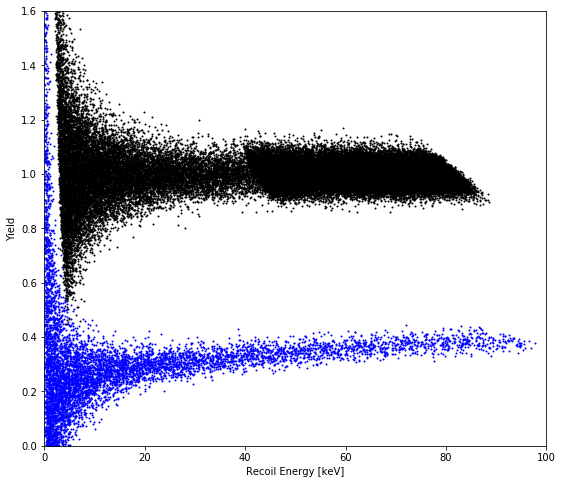

In [255]:
#plot 


fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ax1.plot(ER,Yield,'o',color='b',linewidth=2,markersize=1)
ax1.plot(ERer,Yield_er,'o',color='k',linewidth=2,markersize=1)

ax1.set_xlabel('Recoil Energy [keV]')
ax1.set_ylabel('Yield')
ax1.set_ylim(0,1.6)
ax1.set_xlim(0,100)


plt.show()


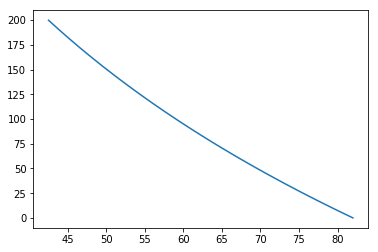

In [258]:
plt.plot(E1er,x)